In [68]:
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import TensorDataset
from torch.optim import Adam, SGD
from torch import optim
from torch.autograd import Variable

In [3]:
device = torch.device("cuda")

In [4]:
epochs=10

In [5]:
base_dir = "./mnist"
print(os.listdir(base_dir))

['test.csv', 'train.csv']


Define LeNet 5 which contains 5 layers -- 2 convolution and 3 fully connected dense layers. 

In [44]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv_1 = nn.Conv2d(1, 6, (5,5), padding=2)
        self.conv_2 = nn.Conv2d(6, 16, (5,5))
        self.fc_1   = nn.Linear(16*5*5, 120)
        self.fc_2   = nn.Linear(120, 84)
        self.fc_3   = nn.Linear(84, 10)
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv_1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv_2(x)), (2,2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc_1(x))
        x = F.relu(self.fc_2(x))
        x = self.fc_3(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [79]:
train = pd.read_csv(base_dir + '/train.csv').values
test = pd.read_csv(base_dir + '/test.csv').values
pd.read_csv(base_dir + '/train.csv').head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Pre-process -- convert data into correct size and normalize

In [80]:
print ("2. Converting data")
trainX  = train[:, 1:].reshape(train.shape[0], 1, 28, 28)
trainX  = trainX.astype(float)
trainX /= 255.0
trainX  = torch.from_numpy(trainX);
trainY = train[:,0];
trainY = trainY.astype(int);
trainY = torch.from_numpy(trainY);
trainY = trainY.view(train.shape[0],-1);
print (trainX.size(), trainY.size())

2. Converting data
torch.Size([42000, 1, 28, 28]) torch.Size([42000, 1])


tensor([7], dtype=torch.int32)


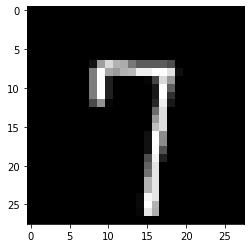

In [82]:
index = 50
pyplot.imshow(x_train.cpu()[index].reshape((28, 28)), cmap="gray")
print(trainY[index])

In [45]:
# Initialize the network
net = LeNet()

Define hyper-params

In [83]:
train_t = train.shape[0]
epoch = 75000
index_v = 0
batch_size = 4

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [87]:
use_gpu = torch.cuda.is_available()
net = net.cuda()

USE GPU


In [89]:
# Training Loop
for epoch in range(tot_epoch):
    if index_v + batch_size >= train_t:
        index_v = 0
    else:
        index_v = index_v + batch_size
    # Fetch Data and Labels
    data  = Variable(trainX[index_v:(index_v+batch_size)].clone())
    label = Variable(trainY[index_v:(index_v+batch_size)].clone(), requires_grad = False)
    # Convert data to pytorch objects
    data  = data.type(torch.FloatTensor)
    label = label.type(torch.LongTensor)
    if use_gpu:
        data  = data.cuda()
        label = label.cuda()
    # Do the learning through backprop using the optimizer
    optimizer.zero_grad()
    out   = net(data)
    label = label.view(batch_size)
    loss  = criterion(out, label)
    loss.backward()
    optimizer.step() 

    if (epoch + 1) % 2000 == 0:
        print("Epoch = %d, Loss = %f" %(epoch+1, mini_loss.data))

Epoch = 2000, Loss = 2.262963
Epoch = 4000, Loss = 2.239201
Epoch = 6000, Loss = 1.794622
Epoch = 8000, Loss = 1.098259
Epoch = 10000, Loss = 0.417671
Epoch = 12000, Loss = 0.377651
Epoch = 14000, Loss = 0.010643
Epoch = 16000, Loss = 0.016616
Epoch = 18000, Loss = 0.304940
Epoch = 20000, Loss = 0.037759
Epoch = 22000, Loss = 0.014095
Epoch = 24000, Loss = 0.007249
Epoch = 26000, Loss = 0.052577
Epoch = 28000, Loss = 0.007794
Epoch = 30000, Loss = 0.304937
Epoch = 32000, Loss = 0.005952
Epoch = 34000, Loss = 0.032157
Epoch = 36000, Loss = 0.036868
Epoch = 38000, Loss = 0.121651
Epoch = 40000, Loss = 0.005932
Epoch = 42000, Loss = 0.050617
Epoch = 44000, Loss = 0.006924
Epoch = 46000, Loss = 0.021020
Epoch = 48000, Loss = 0.006283
Epoch = 50000, Loss = 0.120847
Epoch = 52000, Loss = 0.025698
Epoch = 54000, Loss = 0.017460
Epoch = 56000, Loss = 0.000283
Epoch = 58000, Loss = 0.002351
Epoch = 60000, Loss = 0.117294
Epoch = 62000, Loss = 0.000581
Epoch = 64000, Loss = 0.008483
Epoch = 6600

In [90]:
# Pre-process the test data
Y_data  = test.reshape(test.shape[0], 1, 28, 28)
Y_data  = Y_data.astype(float)
Y_data /= 255.0
Y_data  = torch.from_numpy(Y_data);
print (Y_data.size())
nb_test = test.shape[0]

torch.Size([28000, 1, 28, 28])


In [91]:
net.eval()


LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [93]:
pred_final = np.ndarray(shape = (nb_test, 2), dtype=int)
for i in range(nb_test):
    # Convert and load test data
    sample_data = Variable(Y_data[i:i+1].clone())
    sample_data = sample_data.type(torch.FloatTensor)
    if use_gpu:
        sample_data = sample_data.cuda()
    sample_out = net(sample_data)
    # Get the max probabilities 
    _, pred = torch.max(sample_out, 1)
    pred_final[i][0] = 1 + i
    pred_final[i][1] = pred.data[0]
    if (i + 1) % 2000 == 0:
        print("Total tested = %d" %(i + 1))

Total tested = 2000
Total tested = 4000
Total tested = 6000
Total tested = 8000
Total tested = 10000
Total tested = 12000
Total tested = 14000
Total tested = 16000
Total tested = 18000
Total tested = 20000
Total tested = 22000
Total tested = 24000
Total tested = 26000
Total tested = 28000
